In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [134]:
!pip list |grep Keras

Keras                    2.2.4                
Keras-Applications       1.0.8                
Keras-Preprocessing      1.1.0                


In [81]:
!git clone https://github.com/keras-team/keras.git

Cloning into 'keras'...
remote: Enumerating objects: 31909, done.
remote: Total 31909 (delta 0), reused 0 (delta 0), pack-reused 31909
Receiving objects: 100% (31909/31909), 12.48 MiB | 11.72 MiB/s, done.
Resolving deltas: 100% (23262/23262), done.


In [82]:
import sys
import numpy
import matplotlib
import pandas
import keras

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Numpy: 1.16.4
Matplotlib: 3.0.3
Pandas: 0.24.2
Keras: 2.2.4


In [0]:
from keras import applications
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions



In [87]:
!pip install kerascv

     |████████████████████████████████| 92kB 7.2MB/s 


In [0]:
img_size = 224

from kerascv.model_provider import get_model as kecv_get_model

#set pretrained = True for Imagenet weights
base_model = kecv_get_model(
    name = "seresnext101_32x4d",
    pretrained = False)

In [0]:
# model = VGG16(
#   weights = 'imagenet',
#   include_top = True)

# model.summary()

# epochs = 10
# img_size = 336

# input_tensor = Input(shape=(img_size, img_size, 3))

# base_model = VGG16(
#     weights='imagenet',
#     include_top = False,
#     input_tensor = input_tensor)
    
# #     input_tensor = input_tensor)

In [96]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
lambda_2185 (Lambda)            (None, 230, 230, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
features/init_block/conv/conv ( (None, 112, 112, 64) 9408        lambda_2185[0][0]                
__________________________________________________________________________________________________
features/init_block/conv/bn (Ba (None, 112, 112, 64) 256         features/init_block/conv/conv[0][
__________________________________________________________________________________________________
features/i

In [97]:
for layer in base_model.layers:
    layer.trainable = True
    
base_model.layers[0].trainable = False
base_model.layers[1].trainable = False

model = Model(
    inputs = base_model.input,
    outputs = base_model.get_layer(index = -2).output)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
lambda_2185 (Lambda)            (None, 230, 230, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
features/init_block/conv/conv ( (None, 112, 112, 64) 9408        lambda_2185[0][0]                
__________________________________________________________________________________________________
features/init_block/conv/bn (Ba (None, 112, 112, 64) 256         features/init_block/conv/conv[0][
__________________________________________________________________________________________________
features/i

In [0]:
# x = base_model.output
# x = GlobalAveragePooling2D()(x)

# # x = Dense(
# #     1024,
# #     activation = 'relu')(x)

# # x = Dropout(0.5)(x)

# # x = Dense(
# #     512,
# #     activation = 'relu')(x)

# output = Dense(
#     5,
#     activation='softmax')(x)

# model = Model(
#     inputs=base_model.input,
#     outputs=output)

In [98]:
x = model.output
output = Dense(5, activation = 'softmax')(x)
# output = Activation('softmax')(output)

model = Model(
    inputs = base_model.input,
    outputs = output)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
lambda_2185 (Lambda)            (None, 230, 230, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
features/init_block/conv/conv ( (None, 112, 112, 64) 9408        lambda_2185[0][0]                
__________________________________________________________________________________________________
features/init_block/conv/bn (Ba (None, 112, 112, 64) 256         features/init_block/conv/conv[0][
__________________________________________________________________________________________________
features/i

In [0]:
# model.summary()

In [0]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.0)
#     width_shift_range=0.2,
#     height_shift_range=0.2)

valid_datagen = ImageDataGenerator(
    rescale=1./255)

In [100]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/data/train',
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        '/content/drive/My Drive/data/valid',
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 4438 images belonging to 5 classes.
Found 1218 images belonging to 5 classes.


In [0]:
x_batch, y_batch = next(train_generator)

In [103]:
print(x_batch.max())
print(x_batch.min())

1.0
0.0


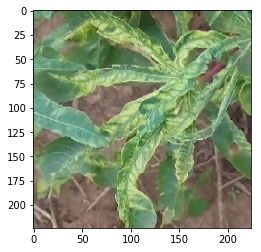

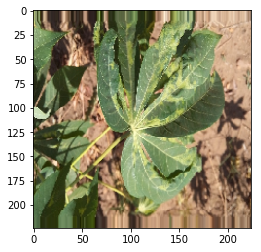

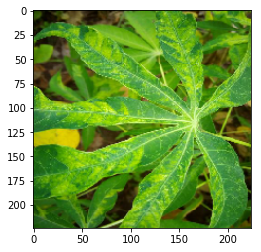

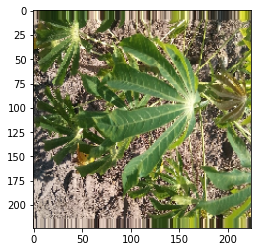

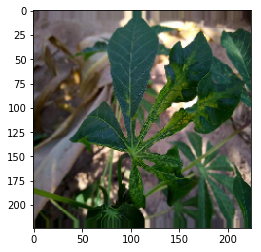

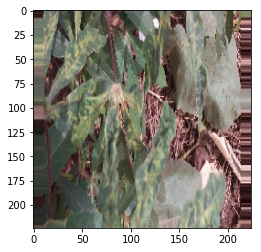

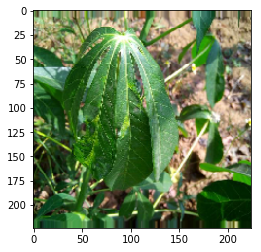

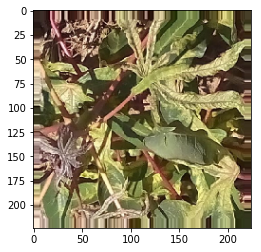

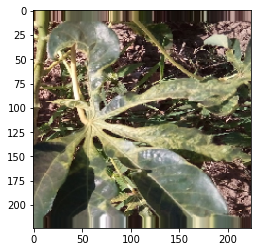

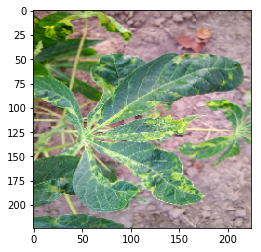

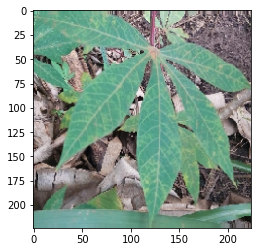

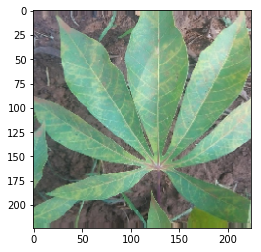

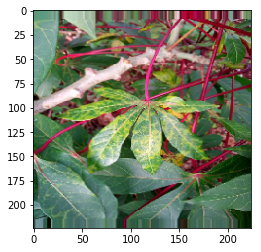

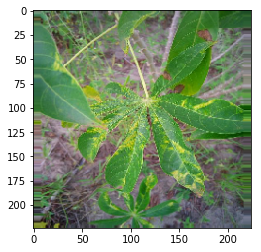

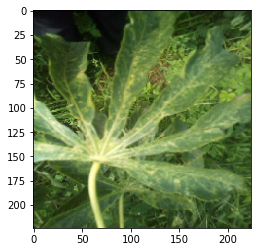

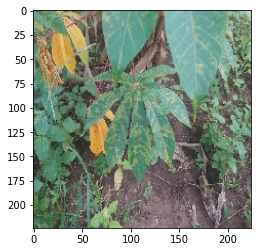

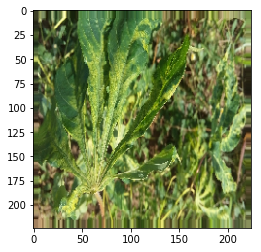

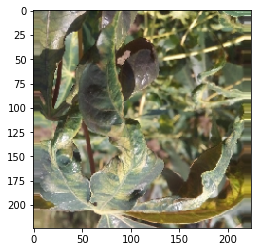

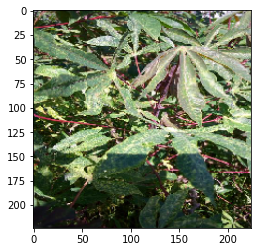

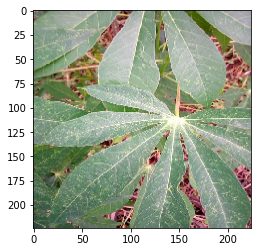

In [104]:
import matplotlib.pyplot as plt

for i in range (0,20):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [0]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


model.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = 1e-5),
              metrics = ['accuracy'])

# early_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     verbose=1,
#     restore_best_weights=False)

filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"

# checkpoint = ModelCheckpoint(
#     filepath,
#     monitor='val_acc',
#     verbose=1,
#     save_best_only=True,
#     mode='max',
#     period = 5)


In [106]:
history = model.fit_generator(generator = train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size + 1,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size + 1,
                    epochs = epochs)
#                    callbacks = [checkpoint])

Epoch 1/10
222/222 [==============================] - 659s 3s/step - loss: 0.4498 - acc: 0.8132 - val_loss: 0.4557 - val_acc: 0.8130
Epoch 2/10
222/222 [==============================] - 480s 2s/step - loss: 0.4017 - acc: 0.8270 - val_loss: 0.5146 - val_acc: 0.8099
Epoch 3/10
222/222 [==============================] - 479s 2s/step - loss: 0.3900 - acc: 0.8331 - val_loss: 0.4248 - val_acc: 0.8156
Epoch 4/10
222/222 [==============================] - 479s 2s/step - loss: 0.3789 - acc: 0.8364 - val_loss: 0.4285 - val_acc: 0.8174
Epoch 5/10
222/222 [==============================] - 479s 2s/step - loss: 0.3718 - acc: 0.8418 - val_loss: 0.4156 - val_acc: 0.8238
Epoch 6/10
222/222 [==============================] - 478s 2s/step - loss: 0.3655 - acc: 0.8446 - val_loss: 0.4279 - val_acc: 0.8368
Epoch 7/10
222/222 [==============================] - 480s 2s/step - loss: 0.3658 - acc: 0.8446 - val_loss: 0.4230 - val_acc: 0.8217
Epoch 8/10
222/222 [==============================] - 480s 2s/step - 

In [107]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(
                directory="/content/drive/My Drive/data/test",
                batch_size=1,
                seed=42,
                shuffle=False,
                class_mode='categorical',
                target_size=(img_size,img_size))

STEP_SIZE_TEST=test_generator.n
test_generator.reset()



Found 3774 images belonging to 1 classes.


In [108]:
pred=model.predict_generator(test_generator,
                steps=STEP_SIZE_TEST,
                verbose=1)

3774/3774 [==============================] - 558s 148ms/step


In [0]:
import numpy as np
import pandas as pd 

predicted_class_indices = np.argmax(
    pred,
    axis=1)

In [110]:
len(predicted_class_indices)

3774

In [111]:
predicted_class_indices[:10]

array([1, 1, 3, 3, 1, 3, 3, 3, 3, 0])

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Category":predictions,
                      "id":filenames})

In [113]:
results.head()

Category                   id
0     cbsd     0/test-img-0.jpg
1     cbsd     0/test-img-1.jpg
2      cmd    0/test-img-10.jpg
3      cmd   0/test-img-100.jpg
4     cbsd  0/test-img-1000.jpg

In [114]:
results.Category.value_counts()

cmd     1642
cbsd    1500
cbb      367
cgm      265
Name: Category, dtype: int64

In [0]:
results.to_csv("submission.csv",index=False)

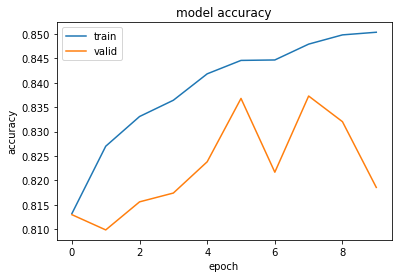

In [116]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

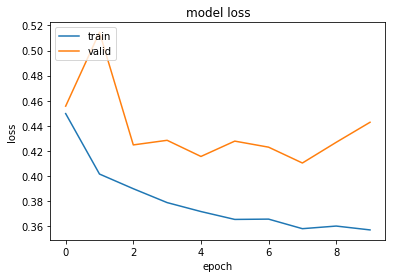

In [117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()